In [2]:
import pandas as pd

### Read and explore data

In [3]:
df=pd.read_csv('../Data/churn-data.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### **Feature Definitions**

| Feature Name         | Description |
|----------------------|-------------|
| **customerID**        | Unique identifier for each customer. |
| **gender**            | Customer’s gender: "Male" or "Female". |
| **SeniorCitizen**     | Whether the customer is a senior citizen: `1` = Yes, `0` = No. |
| **Partner**           | Whether the customer has a partner: "Yes" or "No". |
| **Dependents**        | Whether the customer has dependents (e.g., children): "Yes" or "No". |
| **tenure**            | Number of months the customer has been with the company. |
| **PhoneService**      | Whether the customer has phone service: "Yes" or "No". |
| **MultipleLines**     | Whether the customer has multiple phone lines: "Yes", "No", or "No phone service". |
| **InternetService**   | Type of internet service: "DSL", "Fiber optic", or "No". |
| **OnlineSecurity**    | Whether the customer has online security add-on: "Yes", "No", or "No internet service". |
| **OnlineBackup**      | Whether the customer has online backup add-on: "Yes", "No", or "No internet service". |
| **DeviceProtection**  | Whether the customer has device protection add-on: "Yes", "No", or "No internet service". |
| **TechSupport**       | Whether the customer has tech support: "Yes", "No", or "No internet service". |
| **StreamingTV**       | Whether the customer streams TV through the service: "Yes", "No", or "No internet service". |
| **StreamingMovies**   | Whether the customer streams movies through the service: "Yes", "No", or "No internet service". |
| **Contract**          | Type of contract: "Month-to-month", "One year", or "Two year". |
| **PaperlessBilling**  | Whether the customer uses paperless billing: "Yes" or "No". |
| **PaymentMethod**     | Method of payment: e.g., "Electronic check", "Mailed check", "Bank transfer (automatic)", "Credit card (automatic)". |
| **MonthlyCharges**    | The amount charged to the customer monthly. |
| **TotalCharges**      | The total amount charged to the customer. Needs to be converted to numeric. |
| **Churn**             | Whether the customer has left the company: "Yes" or "No". (This is your target variable.) |


we have noticed that `customerID` has no important so we will drop it
also `TotalCharges` has marked as an object so we will chick for the missing values in this column

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
# see distinct values
for x in df.columns:
    print(f'{x} = {df[x].unique()}')
    print('-'*100)

customerID = ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
----------------------------------------------------------------------------------------------------
gender = ['Female' 'Male']
----------------------------------------------------------------------------------------------------
SeniorCitizen = [0 1]
----------------------------------------------------------------------------------------------------
Partner = ['Yes' 'No']
----------------------------------------------------------------------------------------------------
Dependents = ['No' 'Yes']
----------------------------------------------------------------------------------------------------
tenure = [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
------------------------------------------------------------------

In [8]:
# drop the id column
df.drop('customerID',axis=1,inplace=True)

In [9]:
# check for missing values which are not numbers in totalCharges column
df[df['TotalCharges']==' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [10]:
# fill the missing values in Totalcharges with the median
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce') # convert it to numbers
df.fillna({'TotalCharges': df['TotalCharges'].median()}, inplace=True)

In [11]:
# check the missing values
df[df['TotalCharges']==' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [12]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

### Encode the categorical features

In [13]:
df.columns[df.dtypes=='object']

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [14]:
# binary categorical features
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    if df[col].dtype == 'object':
        df[col]=df[col].str.lower()
        df[col]=df[col].map({'yes':1,"no":0})
# Encode gender
if df['gender'].dtype == 'object':
    df['gender']=df['gender'].str.lower()
    df['gender']=df['gender'].map({'male':1,'female':0})
# ecode the remaining categorical columns using one hot
df=pd.get_dummies(
    df,columns=df.columns[df.dtypes=='object'] 
)

In [15]:
df.columns[df.dtypes=='object']

Index([], dtype='object')

### scale the numerical features

In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df[['tenure', 'MonthlyCharges', 'TotalCharges']]=scaler.fit_transform(
    df[['tenure', 'MonthlyCharges', 'TotalCharges']]
)

### train test split

In [17]:
from sklearn.model_selection import train_test_split
x=df.drop('Churn', axis=1)
y=df['Churn']
x_train,x_test,y_train,y_test=train_test_split(
    x,y,test_size=0.2,random_state=42,stratify=y
)

### Data visulaization

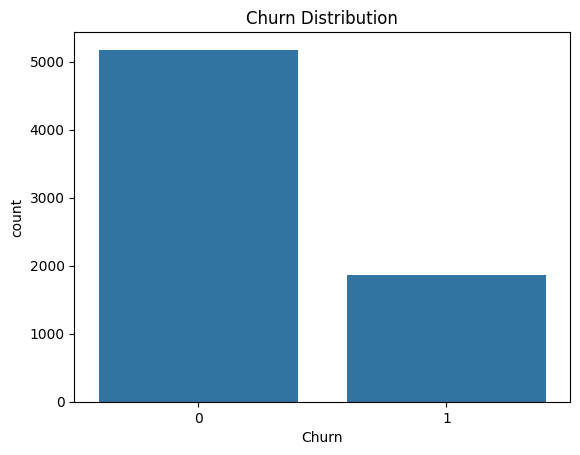

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
# Churn Distribution
sns.countplot(data=df, x='Churn')
plt.title("Churn Distribution")
plt.show()


In [19]:
df['tenure'].unique()

array([-1.27744458,  0.06632742, -1.23672422,  0.51425142, -0.99240204,
       -0.42231695, -0.91096131, -0.17799476,  1.2064976 , -0.78880022,
       -0.66663913,  1.04361615,  0.67713287, -0.30015585,  1.49154015,
        0.79929397,  1.57298088, -0.46303731, -0.82952058, -0.09655404,
        0.59569215,  1.61370124, -0.62591876, -0.21871513, -1.11456313,
        0.55497178, -0.87024095,  1.53226051,  1.24721797,  0.43281069,
       -0.70735949,  1.12505688, -0.5851984 ,  1.36937906, -0.95168167,
       -1.19600386, -0.05583367,  0.71785324,  1.28793833,  0.96217542,
       -1.0331224 ,  0.39209033,  0.10704778,  0.63641251, -0.1372744 ,
        1.32865869,  0.22920887,  1.45081979, -0.01511331,  0.92145506,
        0.18848851,  0.14776815,  0.35136997, -1.07384277, -1.15528349,
        0.02560706,  1.41009942, -0.38159658,  1.00289578,  1.16577724,
       -0.74807986, -0.50375767,  0.84001433,  0.3106496 ,  1.08433651,
       -0.34087622,  0.47353106, -0.54447804,  0.88073469,  0.75

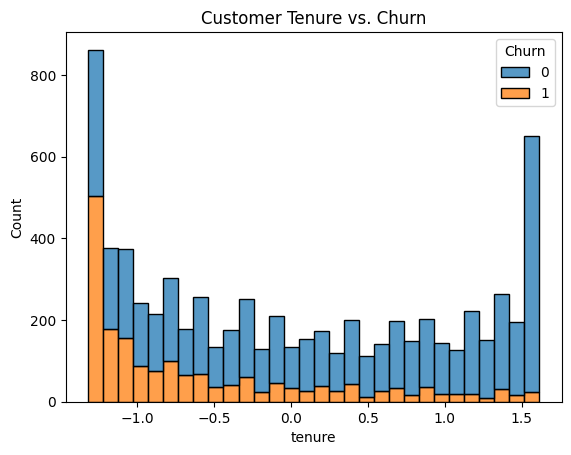

In [20]:
# Customer Tenure Vs Churn
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', bins=30)
plt.title("Customer Tenure vs. Churn")
plt.show()

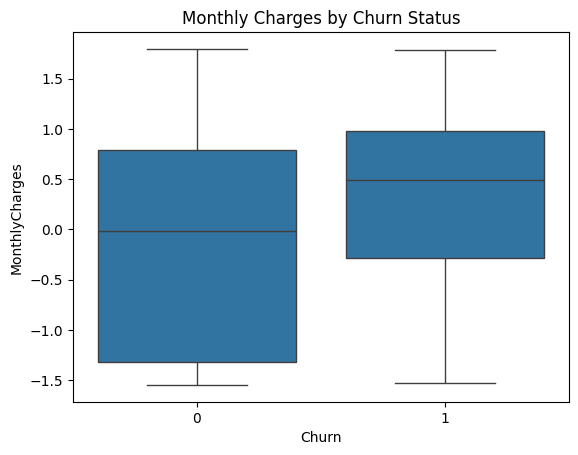

In [21]:

# monthly Charges by Churn Status
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges by Churn Status")
plt.show()

### Correlatin HeatMap

In [22]:
numerical_cols= df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

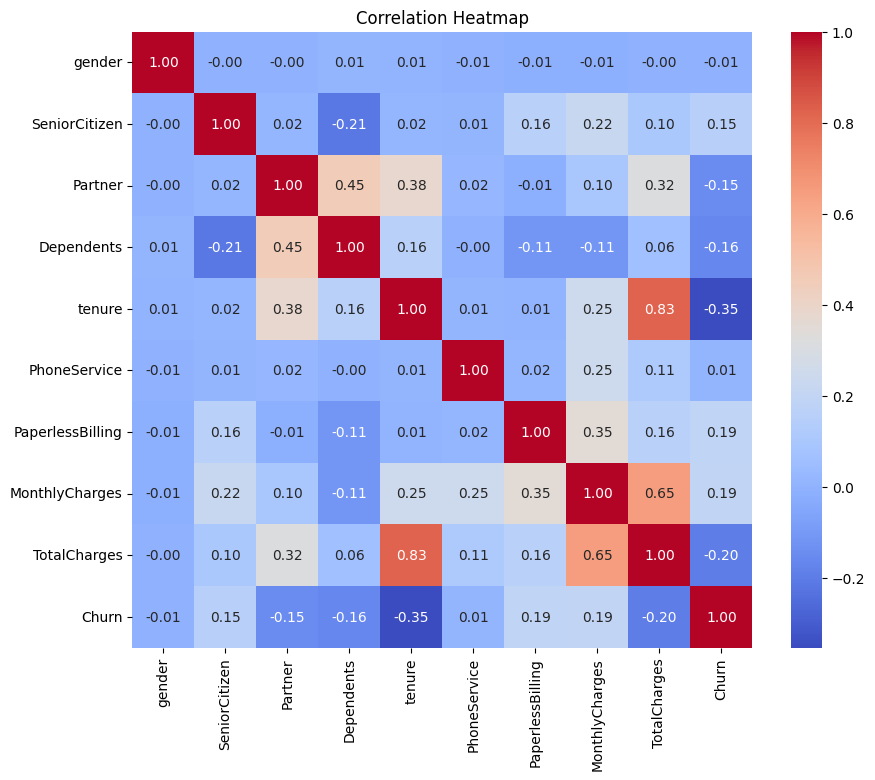

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(df[numerical_cols].corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### modeling step

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
def evaluate_model(model,x_test,y_test,model_name):
    y_pred=model.predict(x_test)
    y_proba=model.predict_proba(x_test)[:,1] if hasattr(model,'predict_proba') else None
    print(f"\n Evaluation for {model_name}")
    print(classification_report(y_test, y_pred))
    if y_proba is not None:
        print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
    cm=confusion_matrix(y_test,y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


### Logistic Regression


 Evaluation for Logistic Regression
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.56      0.61       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409

ROC AUC Score: 0.8419153168513782


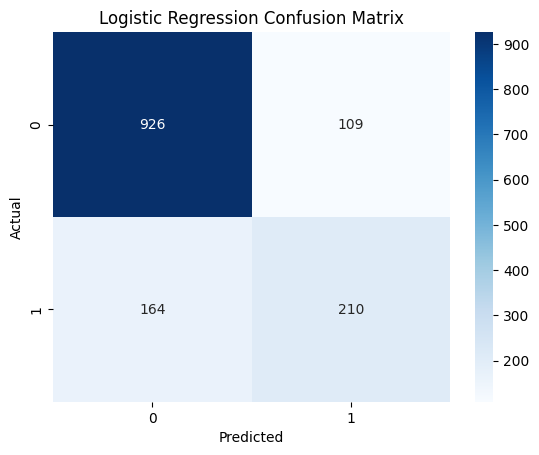

In [26]:
lr=LogisticRegression(max_iter=1000)
lr.fit(x_train,y_train)
evaluate_model(lr,x_test,y_test,"Logistic Regression")

### Random Forest


 Evaluation for Random Forest
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1035
           1       0.61      0.50      0.55       374

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.78      1409

ROC AUC Score: 0.8180268154692707


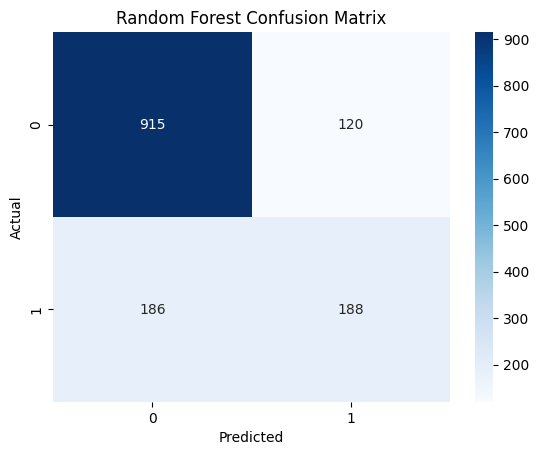

In [27]:
rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)
evaluate_model(rf, x_test, y_test, "Random Forest")

### XGB Classifier

### KNN


 Evaluation for KNN
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1035
           1       0.59      0.48      0.53       374

    accuracy                           0.77      1409
   macro avg       0.71      0.68      0.69      1409
weighted avg       0.76      0.77      0.77      1409

ROC AUC Score: 0.8122968818620993


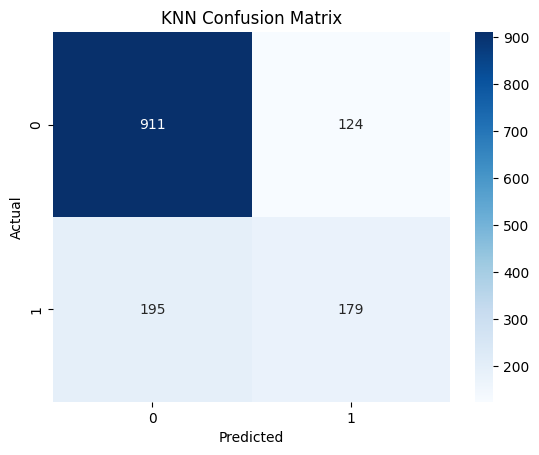

In [28]:
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
evaluate_model(knn, x_test, y_test, "KNN")

### Support Vector Classifier


 Evaluation for SVM
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1035
           1       0.65      0.50      0.57       374

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409

ROC AUC Score: 0.7942648996357435


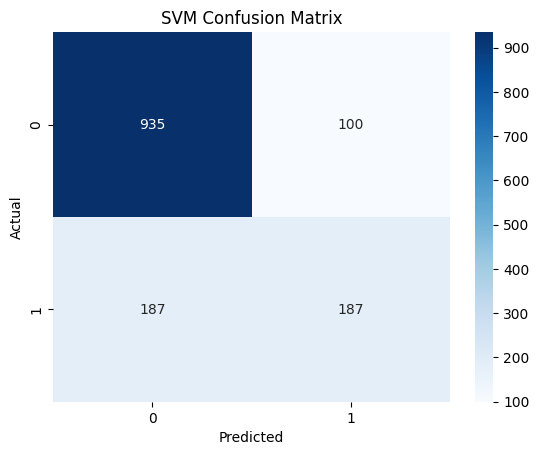

In [29]:
svm = SVC(probability=True)
svm.fit(x_train,y_train)
evaluate_model(svm, x_test, y_test, "SVM")

### Drawing the ROC-AUC Curve for the trained models

In [30]:
models={
    "Logistic Regression": lr,
    "Random Forest": rf,
    "KNN": knn,
    "SVM": svm 
}

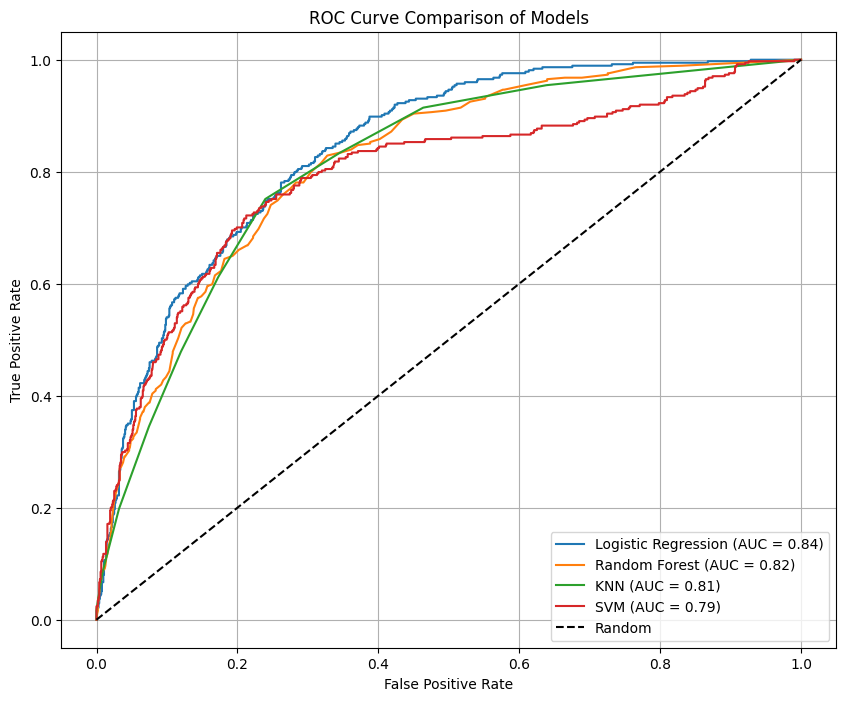

In [31]:
from sklearn.metrics import roc_curve, auc
best_model = None
best_score = 0.0
plt.figure(figsize=(10, 8))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(x_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_proba = model.decision_function(x_test)
    else:
        continue  # skip models that can't return probability or score

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    if roc_auc > best_score:
        best_score = roc_auc
        best_model = model

    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot the random classifier line
plt.plot([0, 1], [0, 1], 'k--', label='Random')

plt.title('ROC Curve Comparison of Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [32]:
import joblib
# Save the model and vectorizer
joblib.dump(best_model, '../models/best_model.pkl')

['../models/best_model.pkl']

In [34]:
joblib.dump(scaler, '../models/scaler.pkl')

['../models/scaler.pkl']